# Import the necessary libraries for analysis and visualization

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the Data set

In [32]:
liver_data = pd.read_csv("indian_liver_patient.csv")

# Looking at the head of the data

In [33]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Check the info of the data

In [34]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [35]:
liver_data.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Check the columns

In [36]:
liver_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# Checking the null values

In [37]:
liver_data.isnull().sum()/len(liver_data)

Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.006861
Dataset                       0.000000
dtype: float64

# Exploratory data analysis (EDA)

1    416
2    167
Name: Dataset, dtype: int64
0    441
1    142
Name: Gender, dtype: int64


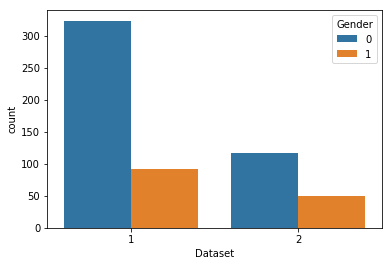

In [38]:
sns.countplot(x = 'Dataset',data=liver_data,hue = 'Gender')
print(liver_data['Dataset'].value_counts())
print(liver_data['Gender'].value_counts())

In [39]:
liver_data[['Age','Gender','Dataset']].groupby(['Dataset','Gender'],as_index=False).count().sort_values(by='Dataset')

,Dataset,Gender,Age
0,1,0,324
1,1,1,92
2,2,0,117
3,2,1,50


In [40]:
liver_data[['Age','Gender','Dataset']].groupby(['Dataset','Gender'],as_index=False).mean().sort_values(by='Dataset')

,Dataset,Gender,Age
0,1,0,46.950617
1,1,1,43.347826
2,2,0,40.598291
3,2,1,42.740000


Text(0.5, 0.98, 'Disease by Gender and Age')

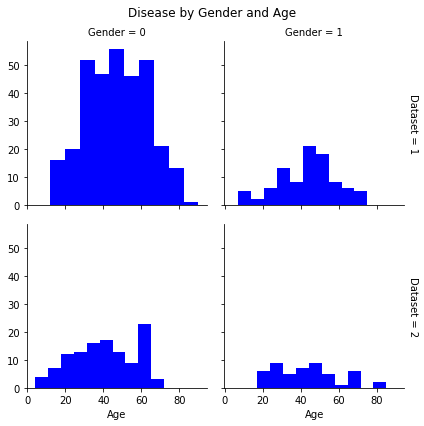

In [41]:
f = sns.FacetGrid(data=liver_data,row='Dataset',col='Gender',margin_titles=True)
f.map(plt.hist,'Age',color='blue')
plt.subplots_adjust(top=0.9)
f.fig.suptitle('Disease by Gender and Age')

In [42]:
liver_data.corr()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131


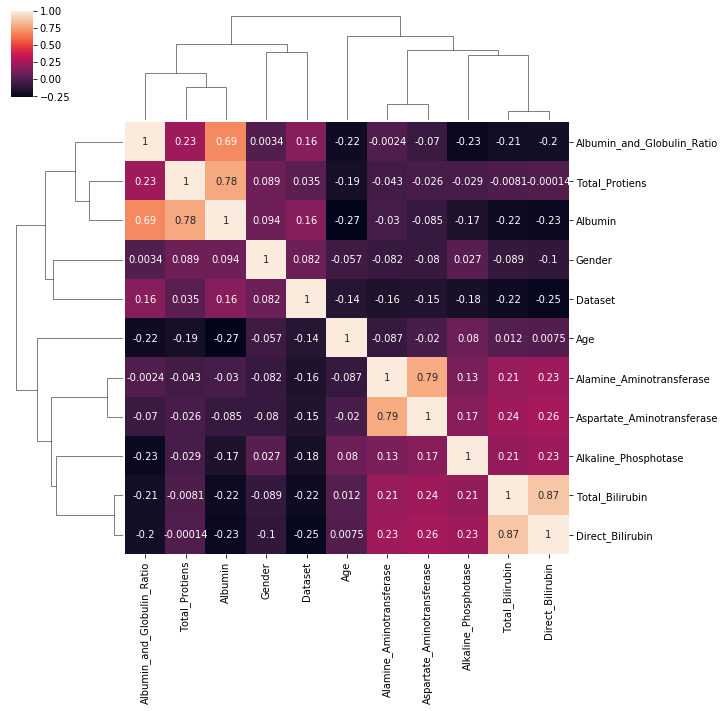

In [43]:
sns.clustermap(liver_data.corr(),annot=True)

In [44]:
liver_data = liver_data.drop(['Direct_Bilirubin','Alamine_Aminotransferase','Albumin_and_Globulin_Ratio'],axis=1)
liver_data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
0,65,1,0.7,187,18,6.8,3.3,1
1,62,0,10.9,699,100,7.5,3.2,1
2,62,0,7.3,490,68,7.0,3.3,1
3,58,0,1.0,182,20,6.8,3.4,1
4,72,0,3.9,195,59,7.3,2.4,1


In [45]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Alkaline_Phosphotase          0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Dataset                       0
dtype: int64

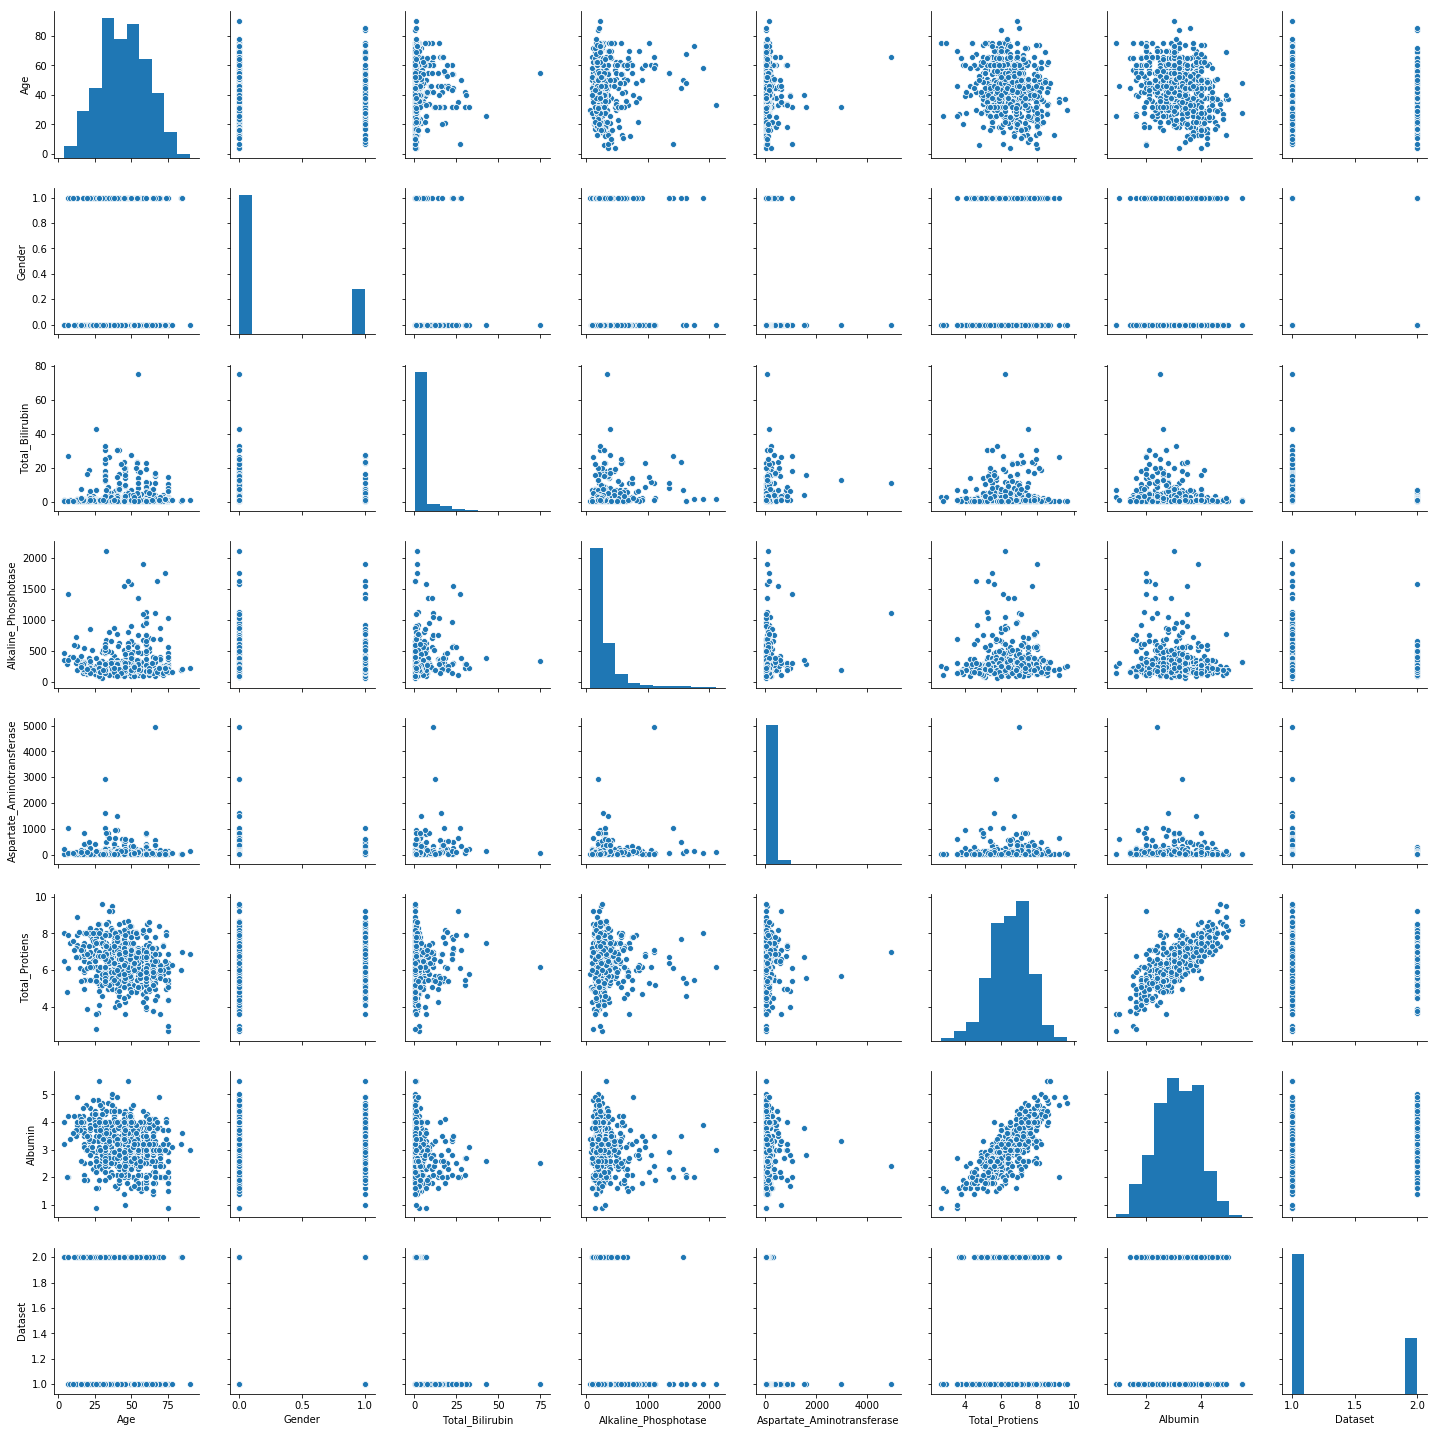

In [46]:
sns.pairplot(liver_data)

In [47]:
print(liver_data['Gender'].unique())
print(liver_data['Dataset'].unique())

[1 0]
[1 2]


In [48]:
df = pd.get_dummies(liver_data['Gender'],drop_first=True)
liver_data = pd.concat([liver_data,df],axis=1)
liver_data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset,1
0,65,1,0.7,187,18,6.8,3.3,1,1
1,62,0,10.9,699,100,7.5,3.2,1,0
2,62,0,7.3,490,68,7.0,3.3,1,0
3,58,0,1.0,182,20,6.8,3.4,1,0
4,72,0,3.9,195,59,7.3,2.4,1,0


In [49]:
liver_data = liver_data.drop('Gender',axis=1)

# Applying Machine Learning Algorithms

In [50]:
liver_data['Dataset'].unique()

array([1, 2])

In [51]:
X = liver_data.drop(['Dataset'],axis=1)
y = liver_data['Dataset']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

/home/lenovo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
rfcpred = rfc.predict(X_test)

# Accuracy Score

In [54]:
print(accuracy_score(y_test,rfcpred))

0.6628571428571428


# Looking to Confusion Matrix

In [30]:
print(confusion_matrix(y_test,rfcpred))

[[102  22]
 [ 31  20]]
